# Linear Regression Stock Prices - Apple Inc Prediction

Predicting Apple Stock Prices using Linear Regressions

In [1]:
import pandas as pd
import numpy as np
import datetime
import quandl
import math
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn import preprocessing #for scaling data
from sklearn.model_selection import train_test_split # for training and testing samples, splitting, shuffling
from sklearn import svm # can use for regression
from sklearn.linear_model import LinearRegression

%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

### Fetch Stock Data via Quandl

In [2]:
df = quandl.get('WIKI/AAPL')

print(df.head())

             Open   High    Low     ...       Adj. Low  Adj. Close  \
Date                                ...                              
1980-12-12  28.75  28.87  28.75     ...          0.423       0.423   
1980-12-15  27.38  27.38  27.25     ...          0.401       0.401   
1980-12-16  25.37  25.37  25.25     ...          0.371       0.371   
1980-12-17  25.87  26.00  25.87     ...          0.380       0.380   
1980-12-18  26.63  26.75  26.63     ...          0.392       0.392   

            Adj. Volume  
Date                     
1980-12-12    1.173e+08  
1980-12-15    4.397e+07  
1980-12-16    2.643e+07  
1980-12-17    2.161e+07  
1980-12-18    1.836e+07  

[5 rows x 12 columns]


### Create Calculated Columns - High - Low % , Percentage Change

In [3]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['High_Low_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0 # High Low %
df['Percent_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 # % change in stock prices

df = df[['Adj. Close', 'High_Low_PCT', 'Percent_Change', 'Adj. Volume']] # We only care about these features.

print(df.head())

            Adj. Close  High_Low_PCT  Percent_Change  Adj. Volume
Date                                                             
1980-12-12       0.423         0.417           0.000    1.173e+08
1980-12-15       0.401         0.477          -0.475    4.397e+07
1980-12-16       0.371         0.475          -0.473    2.643e+07
1980-12-17       0.380         0.503           0.000    2.161e+07
1980-12-18       0.392         0.451           0.000    1.836e+07


### Create Label Column for Forecast

In [4]:
forecast_column = 'Adj. Close'
# To not waste data, we provide features with any null values with some outlier like -112233
df.fillna(-112233, inplace=True) # na means not available, used to fill NaN/nan values
how_many_days = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_column].shift(-how_many_days)

print(df.head())

            Adj. Close  High_Low_PCT  Percent_Change  Adj. Volume  label
Date                                                                    
1980-12-12       0.423         0.417           0.000    1.173e+08  0.410
1980-12-15       0.401         0.477          -0.475    4.397e+07  0.417
1980-12-16       0.371         0.475          -0.473    2.643e+07  0.417
1980-12-17       0.380         0.503           0.000    2.161e+07  0.415
1980-12-18       0.392         0.451           0.000    1.836e+07  0.413


### Data Preprocessing

In [5]:
X = np.array(df.drop(['label'], axis=1)) # this 1 is axis, tells that we need to drop a 'column' named label

"""The preprocessing.scale() algorithm puts your data on one scale. 
This is helpful with largely sparse datasets. In simple words, your data is vastly spread out. 
For example the values of X maybe like so:

X = [1, 4, 400, 10000, 100000]

The issue with sparsity is that it very biased or in statistical terms skewed. 
So, therefore, scaling the data brings all your values onto one scale eliminating the sparsity."""

X = preprocessing.scale(X)
X_lately = X[-how_many_days:]
X = X[:-how_many_days]
# X = X[:-forecast_out+1]
df.dropna(inplace=True)
y = np.array(df['label'])

print(len(X), len(y))

9306 9306


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


### Training and Testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression() # parameter n_jobs is 1 by default. Can increase to make it run faster: parallelism 
# can use n_jobs=-1 to make the most of what your processor can do.
clf.fit(X_train, y_train)

# pickling: good to have at disposal. pickle helps with serialization of a python object
import pickle # used to save. We normally save after training data (fit) because that's the most tedious step

# clf.fit(X_train, y_train): Used after this
with open('LinearRegression.pickle', 'wb') as f:
    pickle.dump(clf, f)
    
# To use the pickle files again
pickle_in = open('LinearRegression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)

# print(accuracy)

### Create a Prediction

In [7]:
stock_prediction = clf.predict(X_lately)

for i in range(how_many_days):
    print('Day {0} prediction: {1}'.format(i+1, stock_prediction[i]))
    
print('\nAccuracy: {0}'.format(accuracy*100))

Day 1 prediction: 188.06771084356419
Day 2 prediction: 186.78734804007408
Day 3 prediction: 186.00314965324907
Day 4 prediction: 183.11861205659272
Day 5 prediction: 180.78626193947161
Day 6 prediction: 182.94993613378332
Day 7 prediction: 181.92371413689793
Day 8 prediction: 181.79563956702634
Day 9 prediction: 184.99069941052036
Day 10 prediction: 187.0549980318133
Day 11 prediction: 187.10708829348656
Day 12 prediction: 186.16221253025896
Day 13 prediction: 184.98128437353185
Day 14 prediction: 181.05141750139822
Day 15 prediction: 183.7235563592283
Day 16 prediction: 182.8453690476012
Day 17 prediction: 181.44721245952212
Day 18 prediction: 181.19167279940694
Day 19 prediction: 180.5547098827505
Day 20 prediction: 181.12864818592422
Day 21 prediction: 181.05234260810303
Day 22 prediction: 184.46461094143146
Day 23 prediction: 183.6233912941643
Day 24 prediction: 184.13618860990155
Day 25 prediction: 184.12911257038928
Day 26 prediction: 185.95256910480947
Day 27 prediction: 188.514

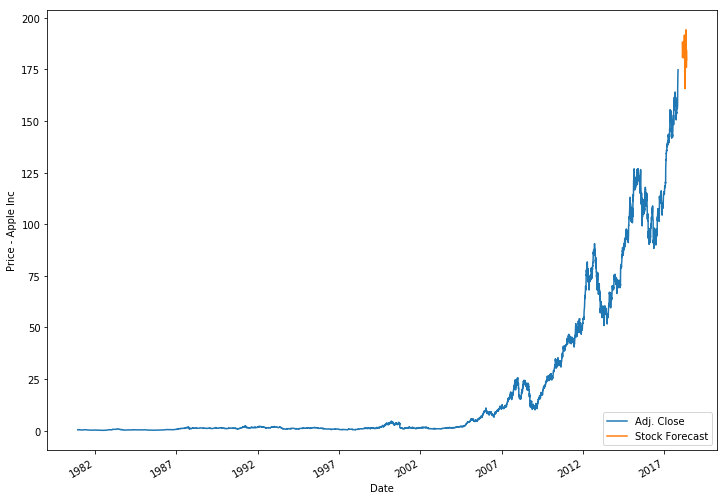

In [9]:
plt.rcParams['figure.figsize'] = (12,9)

df['Stock Forecast'] = np.nan

last_date = df.iloc[-1].name # name of last date in dataset
last_date_unix = last_date.timestamp()
one_day_seconds = 86400
next_date_unix = last_date_unix + one_day_seconds

for i in stock_prediction:
    next_date = datetime.datetime.fromtimestamp(next_date_unix)
    next_date_unix += one_day_seconds
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Stock Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price - Apple Inc')

plt.show()